In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Training_Dataset_v2.csv')
df

C:\Users\Satya.Muralidhar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [3]:
#droppping last row
df=df.drop(df.iloc[-1:].index,inplace=False)

In [4]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [5]:
df['lead_time'].value_counts().unique()

array([682186, 337402, 199700, 128537, 123649,  30113,  16253,  14192,
        10511,  10314,   8843,   5405,   5365,   4031,   3812,   3763,
         1094,    416,    312,    221,    209,    133,    115,    105,
           84,     49,     48,     35,     28,     21,     14,      7],
      dtype=int64)

In [6]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [7]:
df['national_inv'].unique()

array([ 0.0000e+00,  2.0000e+00,  7.0000e+00, ...,  7.9890e+03,
        2.5045e+04, -2.0800e+02])

In [8]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [9]:
#replacing nan values in dateset
df['national_inv']=df['national_inv'].fillna(df['national_inv'].mean())
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['in_transit_qty']=df['in_transit_qty'].fillna(df['in_transit_qty'].mean())
df['forecast_3_month']=df['forecast_3_month'].fillna(df['forecast_3_month'].mean())
df['forecast_6_month']=df['forecast_6_month'].fillna(df['forecast_6_month'].mean())
df['forecast_9_month']=df['forecast_9_month'].fillna(df['forecast_9_month'].mean())
df['sales_1_month']=df['sales_1_month'].fillna(df['sales_1_month'].mean())
df['sales_3_month']=df['sales_3_month'].fillna(df['sales_3_month'].mean())
df['sales_6_month']=df['sales_6_month'].fillna(df['sales_6_month'].mean())
df['sales_9_month']=df['sales_9_month'].fillna(df['sales_9_month'].mean())
df['min_bank']=df['min_bank'].fillna(df['min_bank'].mean())
df['potential_issue']=df['potential_issue'].replace({'Yes':1,'No':0})
df['potential_issue']=df['potential_issue'].fillna(df['potential_issue'].mean())
df['pieces_past_due']=df['pieces_past_due'].fillna(df['pieces_past_due'].mean())
df['perf_6_month_avg']=df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].mean())
df['perf_12_month_avg']=df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].mean())
df['local_bo_qty']=df['local_bo_qty'].fillna(df['local_bo_qty'].mean())
#replaceing yes and no into 1 and 0
df['deck_risk']=df['deck_risk'].replace({'Yes':1,'No':0})
df['deck_risk']=df['deck_risk'].fillna(df['deck_risk'].mean())
df['oe_constraint']=df['oe_constraint'].replace({'Yes':1,'No':0})
df['oe_constraint']=df['oe_constraint'].fillna(df['oe_constraint'].mean())
df['ppap_risk']=df['ppap_risk'].replace({'Yes':1,'No':0})
df['ppap_risk']=df['ppap_risk'].fillna(df['ppap_risk'].mean())
df['stop_auto_buy']=df['stop_auto_buy'].replace({'Yes':1,'No':0})
df['stop_auto_buy']=df['stop_auto_buy'].fillna(df['stop_auto_buy'].mean())
df['rev_stop']=df['rev_stop'].replace({'Yes':1,'No':0})
df['rev_stop']=df['rev_stop'].fillna(df['rev_stop'].mean())
df['went_on_backorder']=df['went_on_backorder'].replace({'Yes':1,'No':0})
df['went_on_backorder']=df['went_on_backorder'].fillna(df['went_on_backorder'].mean())

In [10]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [11]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


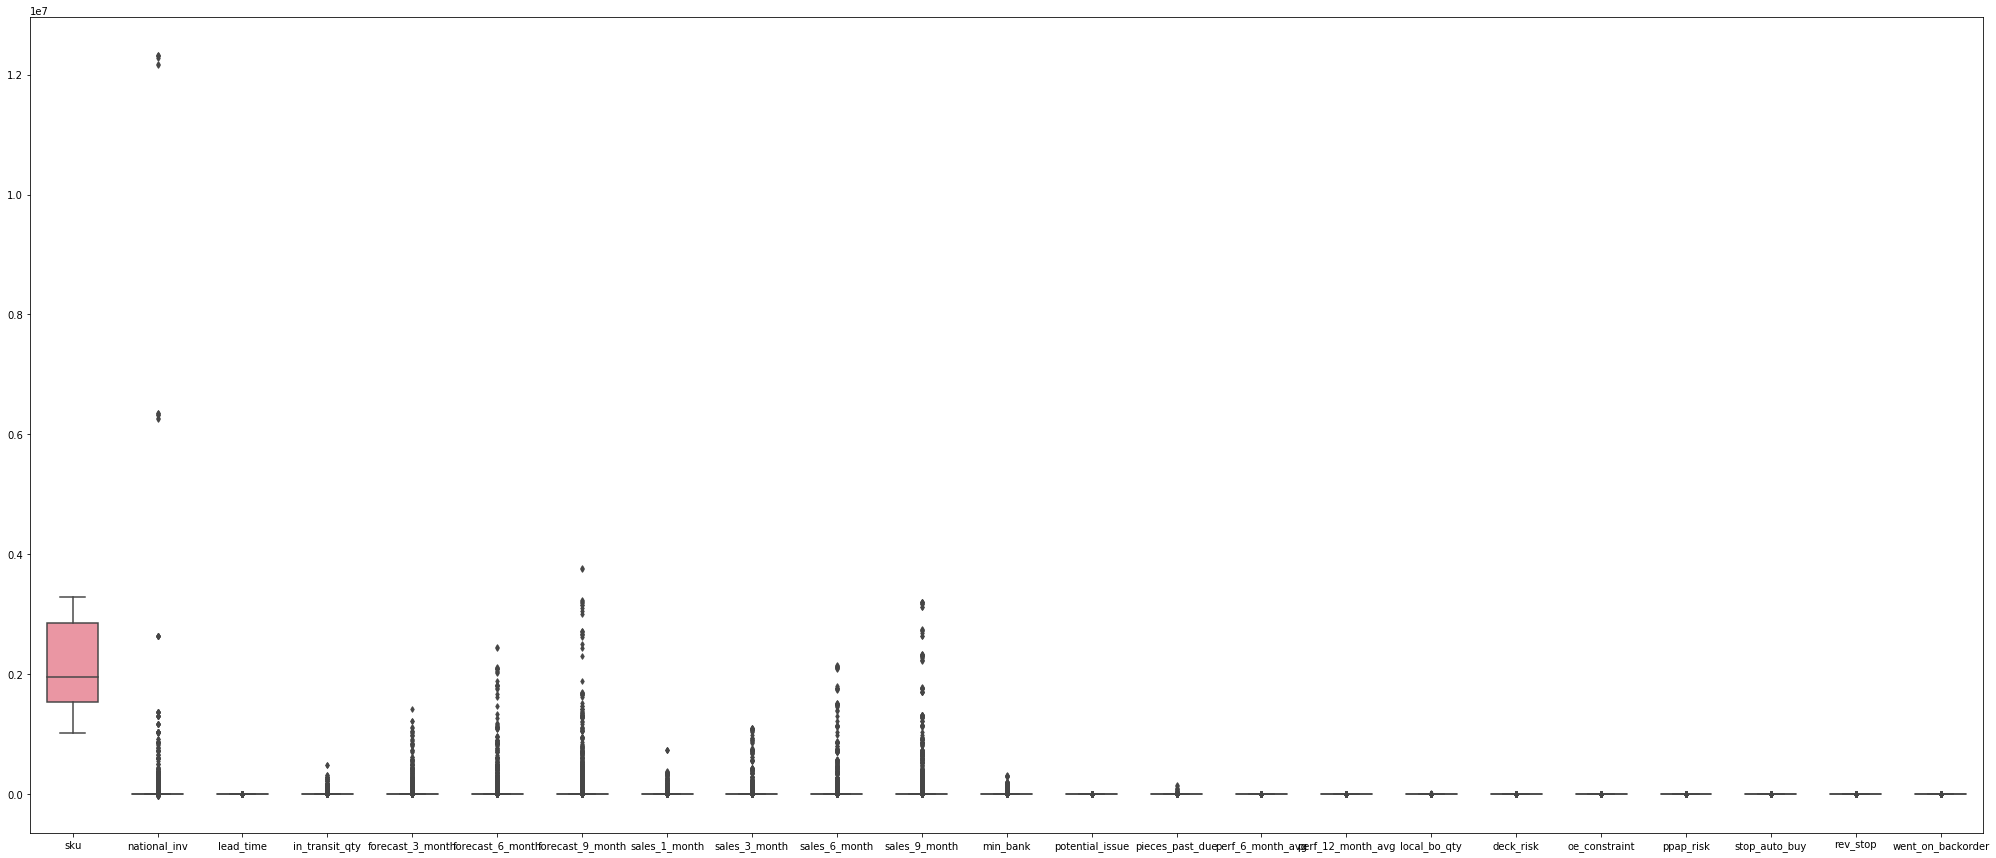

In [12]:
#finding outliers in dataset
fig,ax = plt.subplots(figsize=(35,15),facecolor='white')
sns.boxplot(data=df,ax=ax,width=0.6,fliersize=4)

In [13]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,5.373668e-04,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,2.295706e-01,1.451542e-04,1.207648e-01,9.638086e-01,4.330928e-04,6.690721e-03
std,2.961523e+04,6.841885e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.317495e-02,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,4.205568e-01,1.204713e-02,3.258538e-01,1.867661e-01,2.080638e-02,8.152275e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.000000e+00,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
#df.plot(figsize=(15,5))

In [15]:
#playing with outliers
q=df['national_inv'].quantile(0.85)
data_cleaned=df[df['national_inv']<q]
q=df['lead_time'].quantile(0.98)
data_cleaned=df[df['lead_time']<q]
q=df['in_transit_qty'].quantile(0.95)
data_cleaned=df[df['in_transit_qty']<q]
q=df['forecast_3_month'].quantile(0.93)
data_cleaned=df[df['forecast_3_month']<q]
q=df['forecast_6_month'].quantile(0.90)
data_cleaned=df[df['forecast_6_month']<q]
q=df['forecast_9_month'].quantile(0.88)
data_cleaned=df[df['forecast_9_month']<q]
q=df['sales_1_month'].quantile(0.96)
data_cleaned=df[df['sales_1_month']<q]
q=df['sales_3_month'].quantile(0.93)
data_cleaned=df[df['sales_3_month']<q]
q=df['sales_1_month'].quantile(0.90)
data_cleaned=df[df['sales_6_month']<q]
q=df['sales_9_month'].quantile(0.88)
data_cleaned=df[df['sales_9_month']<q]
q=df['min_bank'].quantile(0.97)
data_cleaned=df[df['min_bank']<q]
q=df['pieces_past_due'].quantile(0.98)
data_cleaned=df[df['pieces_past_due']<q]


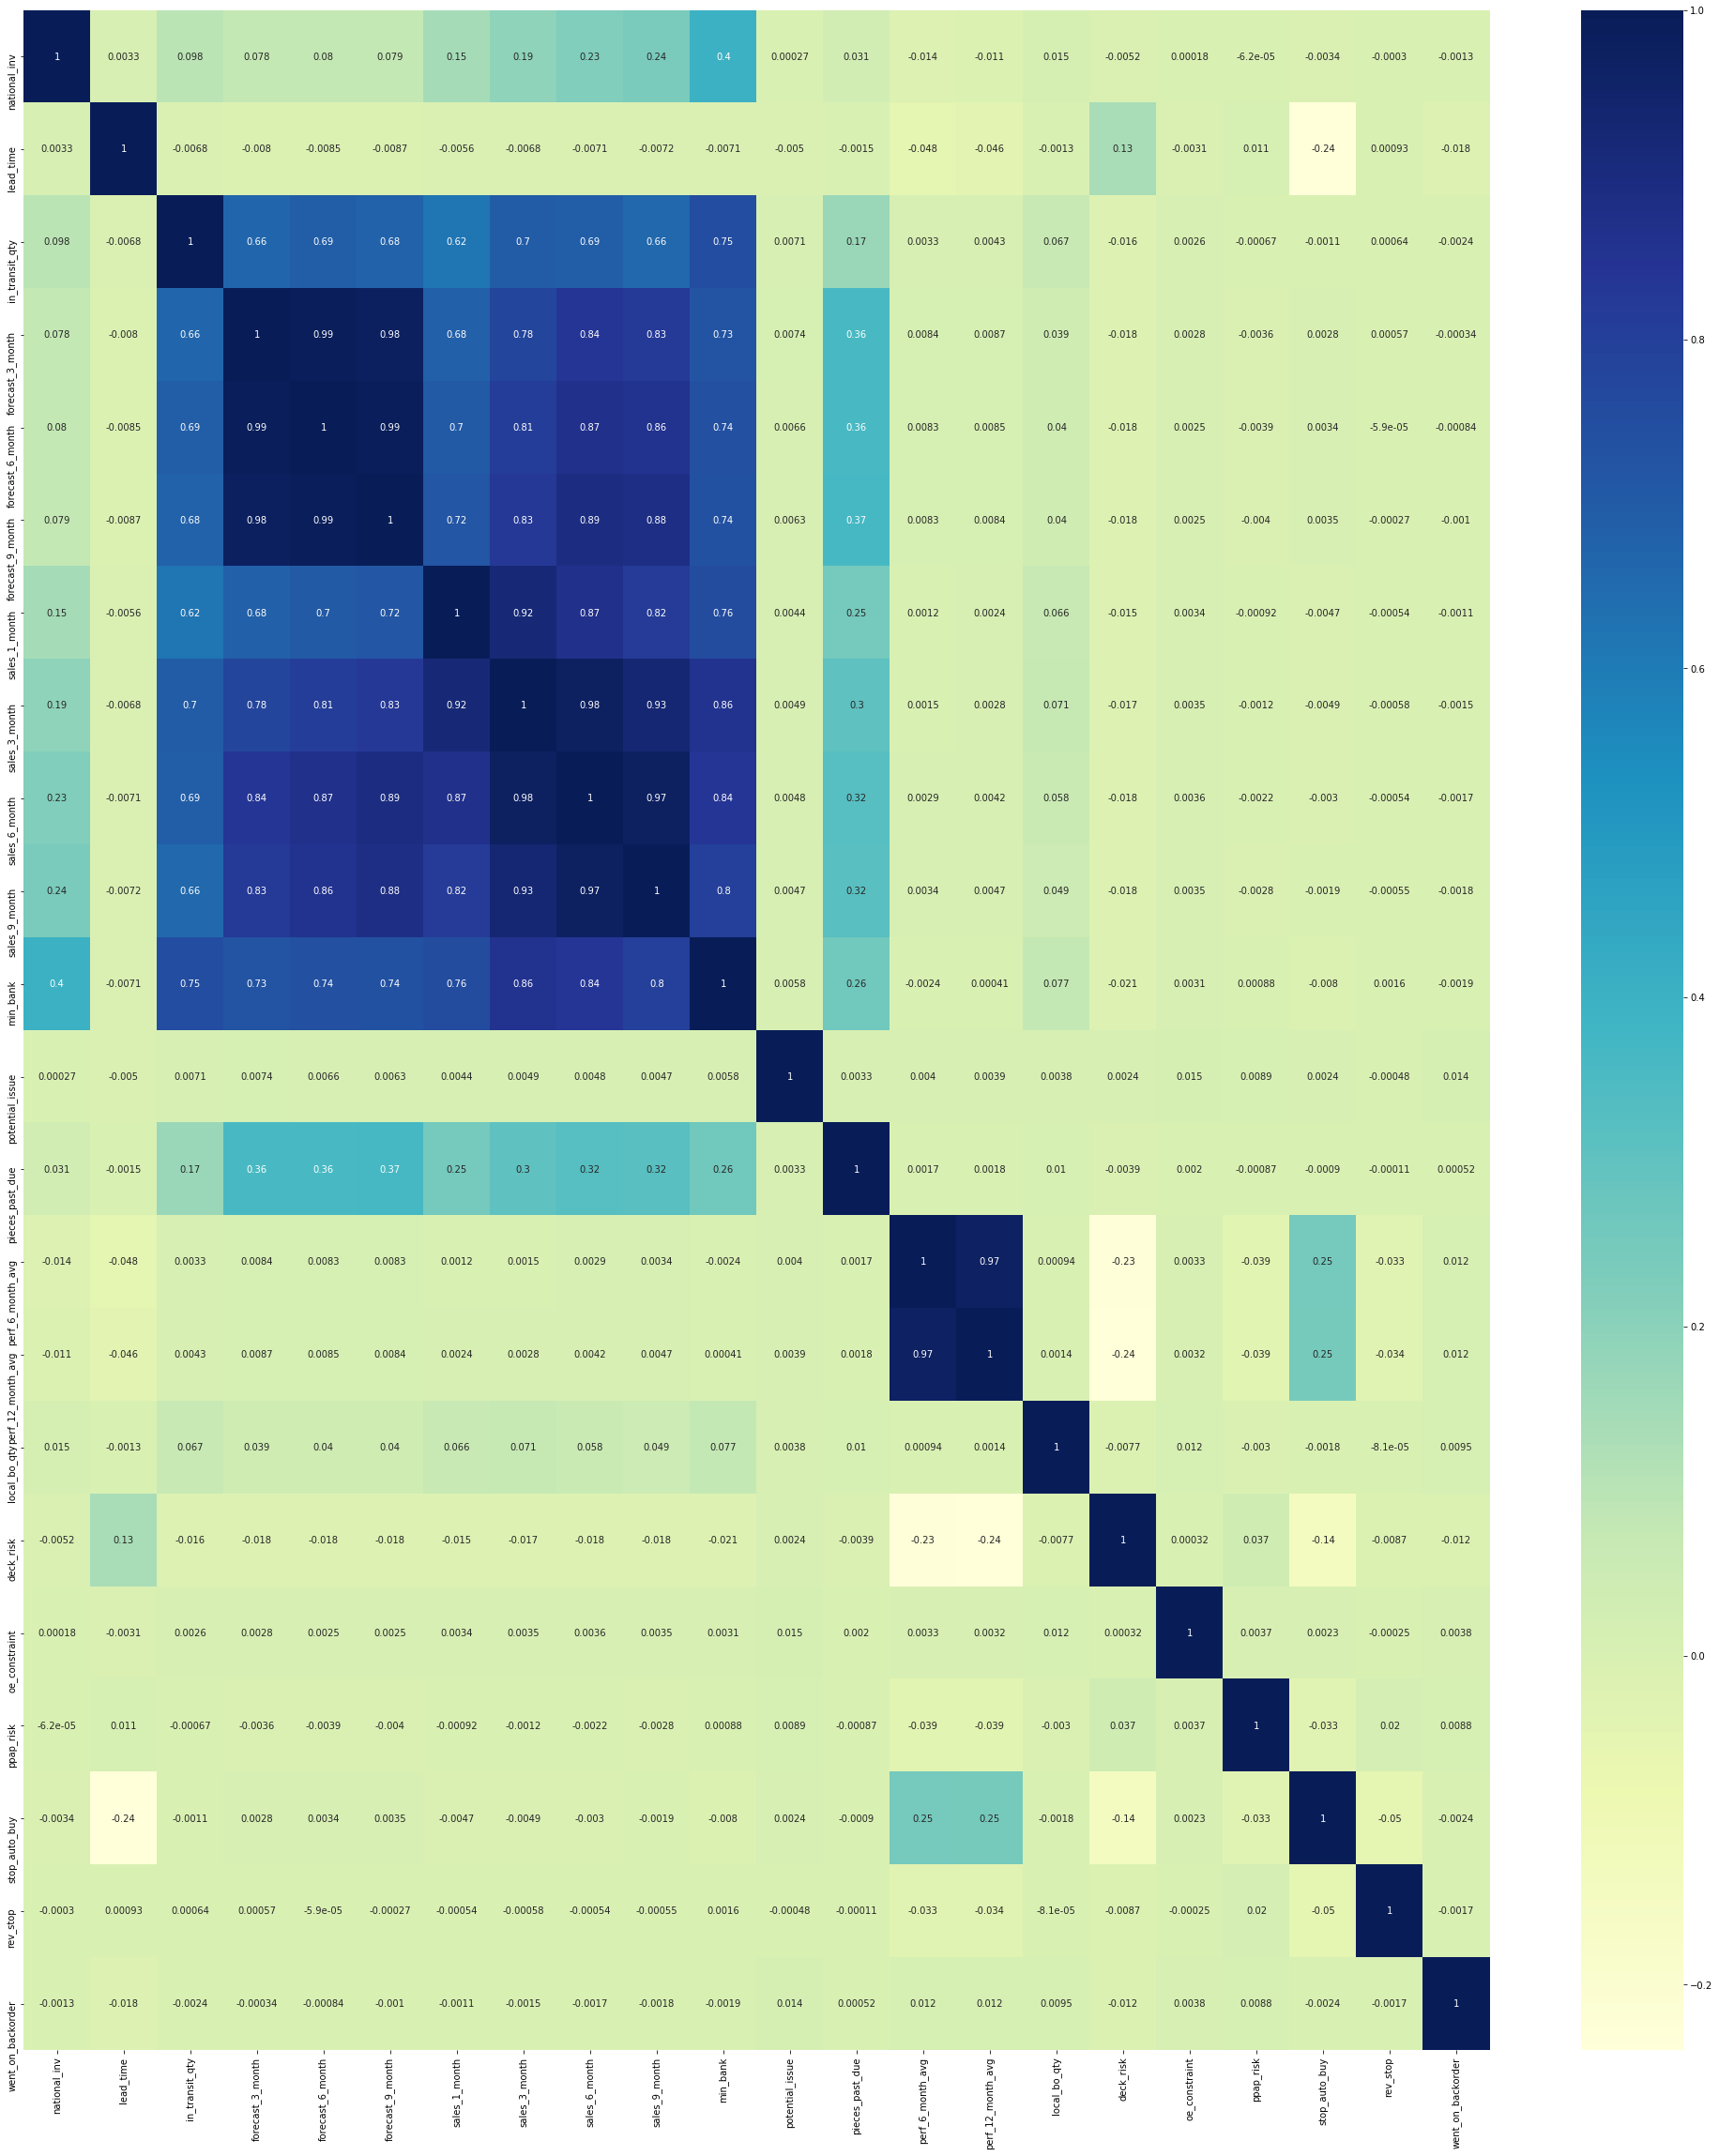

In [16]:
#correlation features
cormat = df.corr()
corr_feature = cormat.index
plt.figure(figsize=(35,40))
g=sns.heatmap(df[corr_feature].corr(),annot=True,cmap="YlGnBu")

In [17]:
X = df.drop(labels='went_on_backorder',axis=1)

In [18]:
y = df['went_on_backorder']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: went_on_backorder, dtype: int64

In [19]:
X.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
dtype: object

In [20]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled

array([[-1.58618621e+00, -1.67519167e-02, -3.89444721e-16, ...,
        -3.70610363e-01,  1.93779233e-01, -2.08153896e-02],
       [-1.56158741e+00, -1.66843838e-02,  1.64827862e-01, ...,
        -3.70610363e-01,  1.93779233e-01, -2.08153896e-02],
       [-1.56112387e+00, -1.66843838e-02, -3.89444721e-16, ...,
        -3.70610363e-01,  1.93779233e-01, -2.08153896e-02],
       ...,
       [-8.47020362e-01, -1.67856831e-02,  1.64827862e-01, ...,
        -3.70610363e-01, -5.16051170e+00, -2.08153896e-02],
       [-9.72982784e-01, -1.46583989e-02,  1.64827862e-01, ...,
        -3.70610363e-01,  1.93779233e-01, -2.08153896e-02],
       [-8.80206527e-01, -1.61103548e-02, -5.65965097e-01, ...,
        -3.70610363e-01,  1.93779233e-01, -2.08153896e-02]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.70,random_state=152)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

In [28]:
rfc=rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9936970060143783

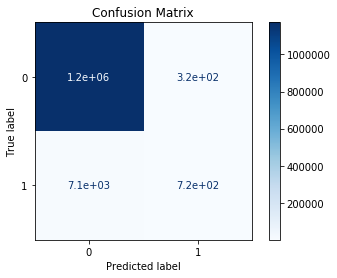

In [33]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rfc,X_test,y_test,cmap=plt.cm.Blues,normalize=None)
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [34]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))


In [43]:
print(model.predict([[1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,1,0,0,0,0]]))

[0]
